In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#create data
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*0.1+0.3

###create tensorflow structure start ###
Weights = tf.Variable(tf.random_uniform([1],-1.0, 1.0))
biases = tf.Variable(tf.zeros([1]))

y = Weights*x_data+biases 

loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.initialize_all_variables()

###create tensorflow structure end ###
sess = tf.Session()
sess.run(init)

for step in range(201):
    sess.run(train)
    if step%20 == 0:
        print(step, sess.run(Weights), sess.run(biases))


Instructions for updating:
Use `tf.global_variables_initializer` instead.
0 [-0.04074788] [ 0.47996756]
20 [ 0.04972159] [ 0.32466155]
40 [ 0.08630652] [ 0.30671665]
60 [ 0.09627051] [ 0.30182934]
80 [ 0.09898426] [ 0.30049825]
100 [ 0.09972335] [ 0.3001357]
120 [ 0.09992465] [ 0.30003697]
140 [ 0.0999795] [ 0.30001006]
160 [ 0.09999442] [ 0.30000275]
180 [ 0.09999846] [ 0.30000076]
200 [ 0.09999959] [ 0.30000022]


In [8]:
matrix1 = tf.constant([[3,3]])
matrix2 = tf.constant([[2],
                     [2]])
product = tf.matmul(matrix1, matrix2)

#sess = tf.Session()
#result = sess.run(product)
#print(result)
#sess.close()

with tf.Session() as sess:
    result2 = sess.run(product)
    print(result2)

[[12]]


In [20]:
state = tf.Variable(0, name='counter')
print (state.name)

one = tf.constant(1)

new_value = tf.add(state, one)
update = tf.assign(state, new_value)

init = tf.initialize_all_variables()

with tf.Session()as sess:
    sess.run(init)
    for p in range(3):
        sess.run(update)
        sess.run(state)
        print(sess.run(state))
        print(state)






counter_10:0
Instructions for updating:
Use `tf.global_variables_initializer` instead.
1
<tf.Variable 'counter_10:0' shape=() dtype=int32_ref>
2
<tf.Variable 'counter_10:0' shape=() dtype=int32_ref>
3
<tf.Variable 'counter_10:0' shape=() dtype=int32_ref>


In [23]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

output = tf.multiply(input1, input2)

with tf.Session() as sess:
    print(sess.run(output, feed_dict={input1:[7.], input2:[2.]}))

[ 14.]


<IPython.core.display.Javascript object>

Instructions for updating:
Use `tf.global_variables_initializer` instead.


<IPython.core.display.Javascript object>


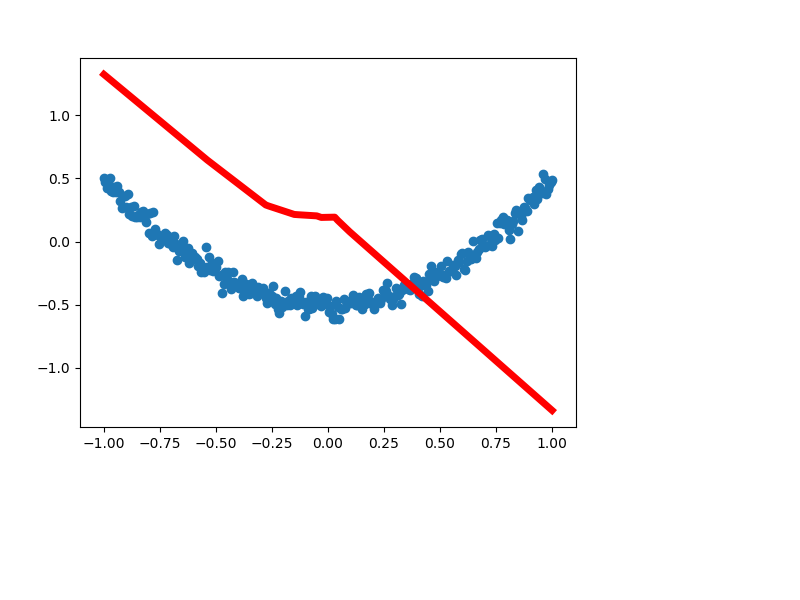

0.684097


D:\ananconda\lib\site-packages\matplotlib\backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


NotImplementedError: 

In [60]:

# View more python learning tutorial on my Youtube and Youku channel!!!

# Youtube video tutorial: https://www.youtube.com/channel/UCdyjiB5H8Pu7aDTNVXTTpcg
# Youku video tutorial: http://i.youku.com/pythontutorial

"""
Please note, this code is only for python 3+. If you are using python 2+, please modify the code accordingly.
"""
from __future__ import print_function
import tensorflow as tf
import numpy as np

%matplotlib notebook

def add_layer(inputs, in_size, out_size, activation_function=None):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

# Make up some real data
x_data = np.linspace(-1,1,300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise


plt.figure()
plt.plot(y_data)
plt.show()

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])
# add hidden layer
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l1, 10, 1, activation_function=None)

# the error between prediction and real data
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                     reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# important step
# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# plot the real data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

for i in range(1000):
    # training
    prediction_value = sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to see the step improvement
        print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))
        # to visualize the result and improvement
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        # plot the prediction
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(0.1)



In [61]:

# View more python learning tutorial on my Youtube and Youku channel!!!

# Youtube video tutorial: https://www.youtube.com/channel/UCdyjiB5H8Pu7aDTNVXTTpcg
# Youku video tutorial: http://i.youku.com/pythontutorial

"""
Please note, this code is only for python 3+. If you are using python 2+, please modify the code accordingly.
"""
from __future__ import print_function
import tensorflow as tf


def add_layer(inputs, in_size, out_size, activation_function=None):
    # add one more layer and return the output of this layer
    with tf.name_scope('layer'):
        with tf.name_scope('weights'):
            Weights = tf.Variable(tf.random_normal([in_size, out_size]), name='W')
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1, out_size]) + 0.1, name='b')
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.add(tf.matmul(inputs, Weights), biases)
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b, )
        return outputs


# define placeholder for inputs to network
with tf.name_scope('inputs'):
    xs = tf.placeholder(tf.float32, [None, 1], name='x_input')
    ys = tf.placeholder(tf.float32, [None, 1], name='y_input')

# add hidden layer
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l1, 10, 1, activation_function=None)

# the error between prediciton and real data
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                                        reduction_indices=[1]))

with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

sess = tf.Session()

# tf.train.SummaryWriter soon be deprecated, use following
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:  # tensorflow version < 0.12
    writer = tf.train.SummaryWriter('logs/', sess.graph)
else: # tensorflow version >= 0.12
    writer = tf.summary.FileWriter("logs/", sess.graph)

# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess.run(init)


In [65]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

def add_layer(inputs, in_size, out_size, activation_function=None):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys})
    return result
    
# number 1 to 10 data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

xs = tf.placeholder(tf.float32, [None, 784], name='x_input')
ys = tf.placeholder(tf.float32, [None, 10], name='y_input')

#add layer 
prediction = add_layer(xs, 784, 10, activation_function=tf.nn.softmax)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys*tf.log(prediction), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.Session()
sess.run(tf.initialize_all_variables())

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs:batch_xs, ys:batch_ys})
    if i % 50 == 0:
        print(compute_accuracy(
            mnist.test.images, mnist.test.labels))






Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `tf.global_variables_initializer` instead.
0.1583
0.6419
0.7416
0.7848
0.8076
0.8243
0.8335
0.8427
0.8473
0.8538
0.8557
0.865
0.8642
0.8656
0.8666
0.8696
0.872
0.8749
0.8736
0.8749


In [73]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
# number 1 to 10 data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result


def weight_variable(shape):
    initial=tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial=tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME' )
    
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 784])   # 28x28
ys = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1, 28, 28, 1])

## conv1 layer ##
W_conv1 = weight_variable([5,5, 1,32]) # patch 5x5, in size 1, out size 32
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # output size 28x28x32
h_pool1 = max_pool_2x2(h_conv1) # output size 14x14x32


## conv2 layer ##
W_conv2 = weight_variable([5,5,32,64]) # patch 5x5, in size 32, out size 64
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # output size 14x14x64
h_pool2 = max_pool_2x2(h_conv1) # output size 7x7x64

## fc1 layer ##
W_fc1 = weight_variable([7*7*64, 1024])
b_fc1 = bias_variable([1024])
# [n_samples, 7, 7, 64] ->> [n_samples, 7*7*64]
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

## fc2 layer ##
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

    
# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

sess = tf.Session()

# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess.run(init)

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    if i % 50 == 0:
        print(compute_accuracy(
            mnist.test.images[:1000], mnist.test.labels[:1000]))


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


InvalidArgumentError: Incompatible shapes: [100,10] vs. [200,10]
	 [[Node: gradients_23/mul_8_grad/BroadcastGradientArgs = BroadcastGradientArgs[T=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"](gradients_23/mul_8_grad/Shape, gradients_23/mul_8_grad/Shape_1)]]

Caused by op 'gradients_23/mul_8_grad/BroadcastGradientArgs', defined at:
  File "D:\ananconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\ananconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\ananconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\ananconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\ananconda\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "D:\ananconda\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "D:\ananconda\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "D:\ananconda\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\ananconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "D:\ananconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "D:\ananconda\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "D:\ananconda\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "D:\ananconda\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "D:\ananconda\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "D:\ananconda\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "D:\ananconda\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "D:\ananconda\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "D:\ananconda\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "D:\ananconda\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "D:\ananconda\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-73-90c5fbee41ac>", line 66, in <module>
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
  File "D:\ananconda\lib\site-packages\tensorflow\python\training\optimizer.py", line 315, in minimize
    grad_loss=grad_loss)
  File "D:\ananconda\lib\site-packages\tensorflow\python\training\optimizer.py", line 386, in compute_gradients
    colocate_gradients_with_ops=colocate_gradients_with_ops)
  File "D:\ananconda\lib\site-packages\tensorflow\python\ops\gradients_impl.py", line 542, in gradients
    grad_scope, op, func_call, lambda: grad_fn(op, *out_grads))
  File "D:\ananconda\lib\site-packages\tensorflow\python\ops\gradients_impl.py", line 348, in _MaybeCompile
    return grad_fn()  # Exit early
  File "D:\ananconda\lib\site-packages\tensorflow\python\ops\gradients_impl.py", line 542, in <lambda>
    grad_scope, op, func_call, lambda: grad_fn(op, *out_grads))
  File "D:\ananconda\lib\site-packages\tensorflow\python\ops\math_grad.py", line 713, in _MulGrad
    rx, ry = gen_array_ops._broadcast_gradient_args(sx, sy)
  File "D:\ananconda\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 393, in _broadcast_gradient_args
    name=name)
  File "D:\ananconda\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "D:\ananconda\lib\site-packages\tensorflow\python\framework\ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "D:\ananconda\lib\site-packages\tensorflow\python\framework\ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

...which was originally created as op 'mul_8', defined at:
  File "D:\ananconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
[elided 18 identical lines from previous traceback]
  File "D:\ananconda\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-73-90c5fbee41ac>", line 64, in <module>
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
  File "D:\ananconda\lib\site-packages\tensorflow\python\ops\math_ops.py", line 865, in binary_op_wrapper
    return func(x, y, name=name)
  File "D:\ananconda\lib\site-packages\tensorflow\python\ops\math_ops.py", line 1088, in _mul_dispatch
    return gen_math_ops._mul(x, y, name=name)
  File "D:\ananconda\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 1449, in _mul
    result = _op_def_lib.apply_op("Mul", x=x, y=y, name=name)
  File "D:\ananconda\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "D:\ananconda\lib\site-packages\tensorflow\python\framework\ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "D:\ananconda\lib\site-packages\tensorflow\python\framework\ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Incompatible shapes: [100,10] vs. [200,10]
	 [[Node: gradients_23/mul_8_grad/BroadcastGradientArgs = BroadcastGradientArgs[T=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"](gradients_23/mul_8_grad/Shape, gradients_23/mul_8_grad/Shape_1)]]


In [ ]:

# View more python learning tutorial on my Youtube and Youku channel!!!

# Youtube video tutorial: https://www.youtube.com/channel/UCdyjiB5H8Pu7aDTNVXTTpcg
# Youku video tutorial: http://i.youku.com/pythontutorial

"""
Please note, this code is only for python 3+. If you are using python 2+, please modify the code accordingly.
"""
from __future__ import print_function
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# load data
digits = load_digits()
X = digits.data
y = digits.target
y = LabelBinarizer().fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)


def add_layer(inputs, in_size, out_size, layer_name, activation_function=None, ):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1, )
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    # here to dropout
    Wx_plus_b = tf.nn.dropout(Wx_plus_b, keep_prob)
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b, )
    tf.summary.histogram(layer_name + '/outputs', outputs)
    return outputs


# define placeholder for inputs to network
keep_prob = tf.placeholder(tf.float32)
xs = tf.placeholder(tf.float32, [None, 64])  # 8x8
ys = tf.placeholder(tf.float32, [None, 10])

# add output layer
l1 = add_layer(xs, 64, 50, 'l1', activation_function=tf.nn.tanh)
prediction = add_layer(l1, 50, 10, 'l2', activation_function=tf.nn.softmax)

# the loss between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))  # loss
tf.summary.scalar('loss', cross_entropy)
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.Session()
merged = tf.summary.merge_all()
# summary writer goes in here
train_writer = tf.summary.FileWriter("logs/train", sess.graph)
test_writer = tf.summary.FileWriter("logs/test", sess.graph)

# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess.run(init)
for i in range(500):
    # here to determine the keeping probability
    sess.run(train_step, feed_dict={xs: X_train, ys: y_train, keep_prob: 0.5})
    if i % 50 == 0:
        # record loss
        train_result = sess.run(merged, feed_dict={xs: X_train, ys: y_train, keep_prob: 1})
        test_result = sess.run(merged, feed_dict={xs: X_test, ys: y_test, keep_prob: 1})
        train_writer.add_summary(train_result, i)
        test_writer.add_summary(test_result, i)
